# Unsupervised Clustering
## 1. Hierarchical Clustering (HC) 

Hierarchical clustering is also one of the more popular methods of identifying structre in your data. 


HC relies on constructing a tree like diagram called a DENDOGRAM. This is what it looks like:

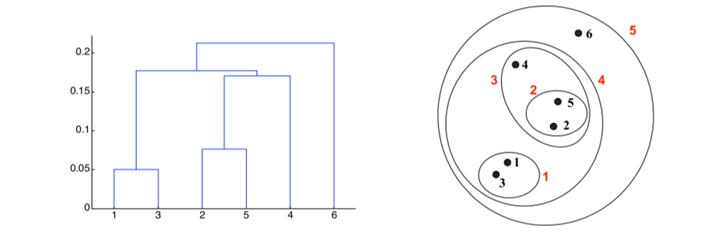

What the picture above is telling you is that for the first set of clusters: datapoints 1, 3 are grouped together, 2 and 5 are grouped together etc. 4 and 6 are individual points. You have a total of 4 clusters. As you decrease the number of clusters, we see additional pairing such as cluster (2, 5) with 4 and so on. 


You can find a specified number of clusters by chopping the tree at any point. If you chop the tree after the second branch from the top, you will get 2 clusters. If you chop it after the 3rd branch, you will get 3 clusters. 


### Features of Hierarchical Clustering
1. No prior assumption on the number of clusters
2. A distance matrix is used to group points/clusters
3. Generally time-consuming for more than a 1000 points (distance computation becomes overwhelming)

## 2. The Hierarchical Clustering Algorithm
Hierarchical clustering can be performed using two approaches. Agglomerative clustering is the most common application.

* **Agglomerative clustering** uses a bottom-up approach, wherein each data point starts in its own cluster. These clusters are then joined greedily, by taking the two most similar clusters together and merging them.
* **Divisive clustering** uses a top-down approach, wherein all data points start in the same cluster. You can then use a parametric clustering algorithm like K-Means to divide the cluster into two clusters. For each cluster, you further divide it down to two clusters until you hit the desired number of clusters.

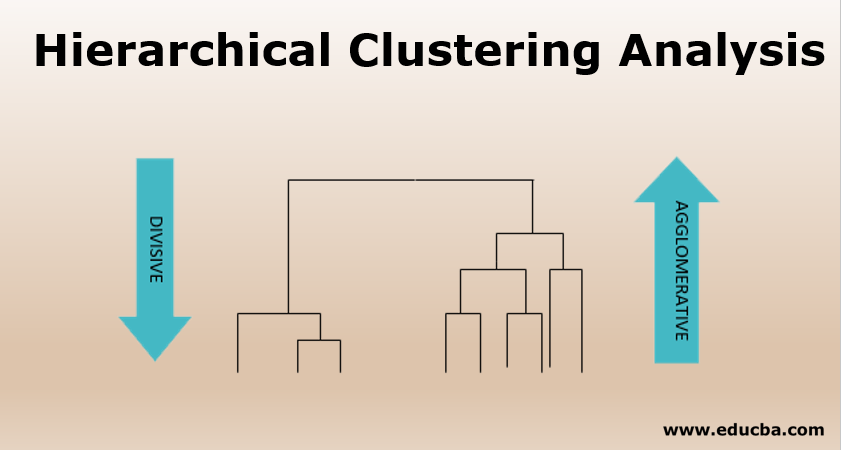


## 2.1 Distance Metrics

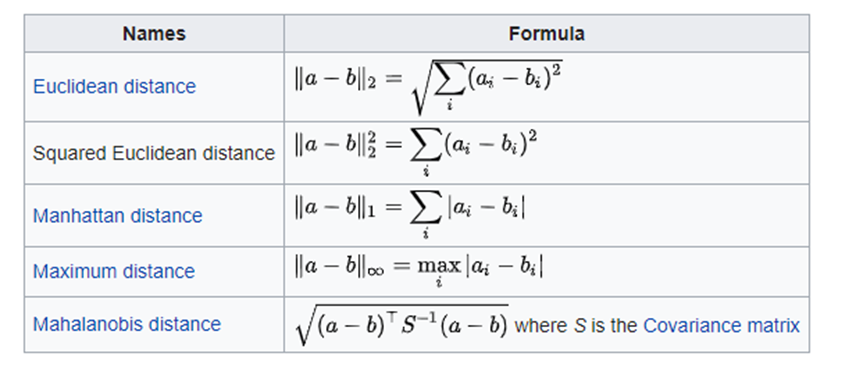

## 3. Agglomerative Clustering
### 3.1 Single Linkage

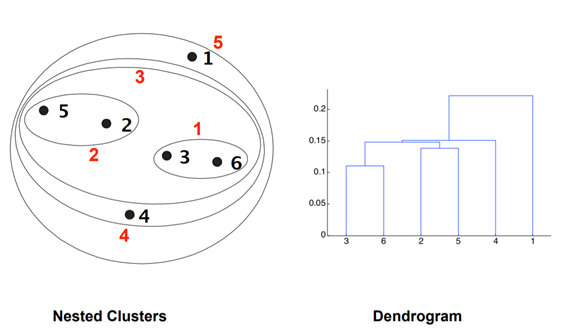

 

1. **Distance between clusters** is defined by the **distance between the 2 most similar objects (closest points) in the clusters**
2. Compute the inter-cluster distance for all clusters
3. Find the minimum of the inter-cluster distances. This corresponds to two clusters that are the closest in some sense, so they will be grouped. 
4. Return to Step 1 or exit if you have a desired number of clusters.

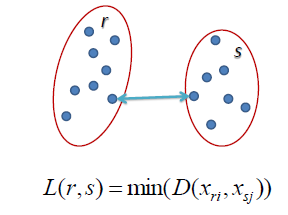

However, single-linkage clustering is not a very popular approach, because it merges clusters that can be large. 
1. The end result is that the SSW can be a very large quantity. Do keep in mind, that we would like to create homogenous groupings, so an increase in within-group variability is not necessarily desirable.
2. It also leads to one sided trees (dendograms) that dont look intuitive. 

What do I mean by that? Notice the picture above. (3, 6) and (5, 2) are two clusters, numbered 1 and 2 respectively.

What do I group next? Visually, it appears like (3, 6, 4) should be the next cluster. Unfortunately, because single linkage uses the minimum closest distance between clusters, it groups (5, 2, 3, 6) together. So what is wrong with this?

If you look closer, points 5 and 6 are really far apart, but because I was grouping clusters based on the nearest distance (2->3 is smaller than 4->3 or 1->3), I end up with clusters that have a huge variability within them. This defeats the purpose of clustering because clusters become more inhomogeneous. 

### 3.2 Complete LInkage

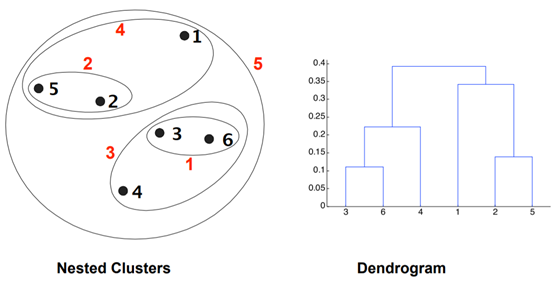

1. Distance between clusters is defined by the distance between the 2 most dissimilar objects (farthest points) in the clusters
2. Compute all inter-cluster distances.
3. Chose the minimum of the inter-cluster distances. This defines two clusters that are the closest in some sense and can be grouped.
4. Return to Step 1 or exit if you have have a specified number of clusters.


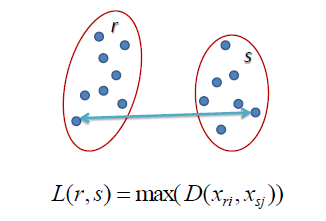
Source: https://www.saedsayad.com/clustering_hierarchical.htm

Looking at the complete linkage method above, (2, 5) and (3, 6) are the initial clusters. The next grouping looks at the smallest maximum distance between clusters. So because 5->6 is much larger than 4->6 or 1->6, 4 is grouped with (3, 6) to form the next cluster. And so on....

There are **several other options** for grouping:

* **Average-linkage**: inter-cluster distance is the distance between the centroids of the 2 clusters

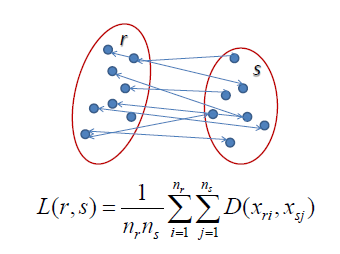
* **Ward-linkage**: When you group clusters, you obviously increase the variance within the cluster. Chose the 2 clusters that will lead to the least increase in variance or least increase in SSW. A cautionary note over here: Ward linkage can sometimes behave like K-Means, so if K-Means did not work for you, maybe even Ward linkage may not be useful. However, this is a very popular approach. Keep in mind again that there is no one size fits all solution. You will have to try different solutions and ensure you get acceptable results.

## 4. Toy Example

We are going to repeat the same example we saw with KMeans clustering. First the synthetic example....

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import sklearn

Text(0, 0.5, 'X2')

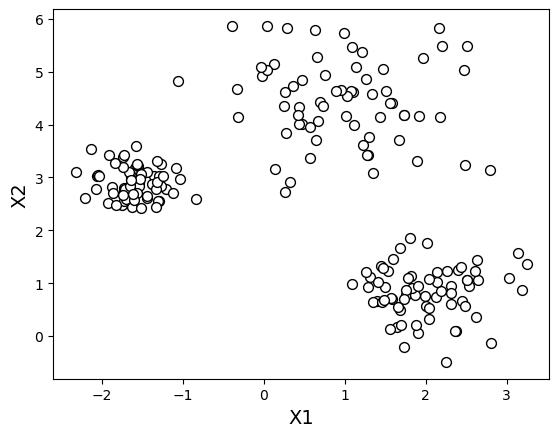

In [2]:
from sklearn.datasets import make_blobs


# Create dataset
blob_std = np.array([0.8, 0.5, 0.3])

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=blob_std, shuffle=True, random_state=0)

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)

Let us colorcode the points based on which cluster they belong to. You want Hierarchical Clustering to discover these patterns as well. 

Text(0, 0.5, 'X2')

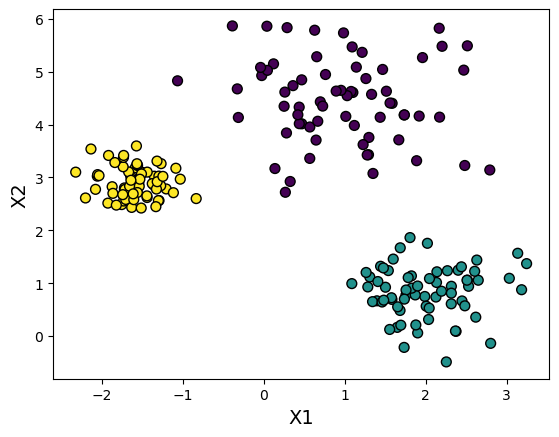

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black', s=50)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)

In [4]:
print(X)

[[-1.58897512  3.18193593]
 [ 0.69794036  4.4288665 ]
 [ 1.10022802  4.60631734]
 [-1.49758652  3.09276837]
 [ 1.21486062  5.36489604]
 [-1.29492812  2.56271807]
 [ 2.31579996  0.60976968]
 [ 1.8062513   1.86242969]
 [ 1.07779975  4.62537882]
 [-1.58410006  2.79942741]
 [ 0.65372852  5.28174338]
 [-1.31877207  2.87001023]
 [ 1.58510026  4.40112734]
 [ 1.29307545  3.42933812]
 [ 0.25043139  4.34534364]
 [-1.35671693  2.85107973]
 [ 2.4484315   0.66445411]
 [ 2.1262441   0.73799945]
 [ 0.32575305  2.92276125]
 [-2.13610935  3.53723012]
 [-1.35334756  3.0227786 ]
 [ 1.68289011  0.48444439]
 [ 1.01287689  4.15404025]
 [ 1.73407165  4.17977925]
 [-2.20357328  2.61113021]
 [-0.3148482   4.1335951 ]
 [ 1.73345832 -0.21403792]
 [-1.75614719  2.48654482]
 [-1.26952684  3.26021282]
 [-1.54539193  2.88569068]
 [ 1.34880003  3.07479238]
 [ 0.9846701   5.73248372]
 [-1.53955545  2.8318161 ]
 [ 0.64537489  3.70582348]
 [ 1.64858539  0.1644515 ]
 [ 2.31721303  0.9418747 ]
 [ 1.2613632   4.86904586]
 

The model we borrow from Sklearn is **AgglomerativeClustering**. Notice that I also do a fit_predict on the data given by the Numpy array, X.

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
# First define the model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'single')

# Apply the model to the data and predict the clusters
y_hc = hc.fit_predict(X)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'X2')

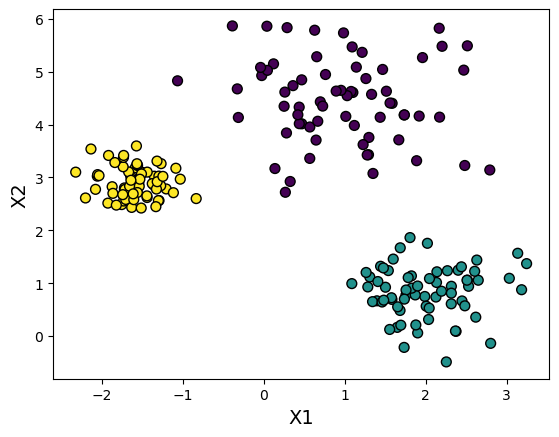

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_hc, marker='o', edgecolor='black', s=50)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)

Although the 'Single Linkage' method appears to be working quite well, the way it goes about forming clusters is rather unusual. See what happens when we draw the dendogram below and compare the dendogram obtained if you chose 'complete linkage' instead.

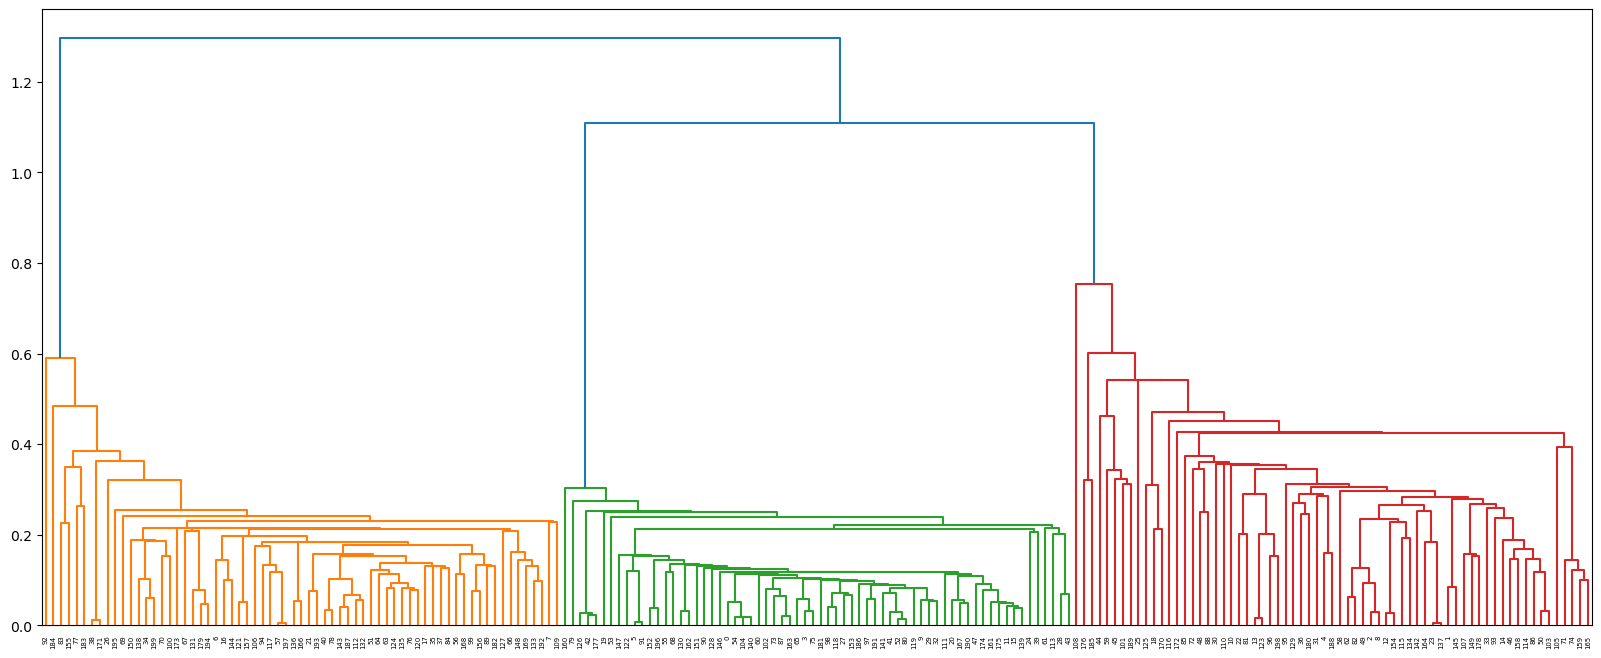

In [8]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

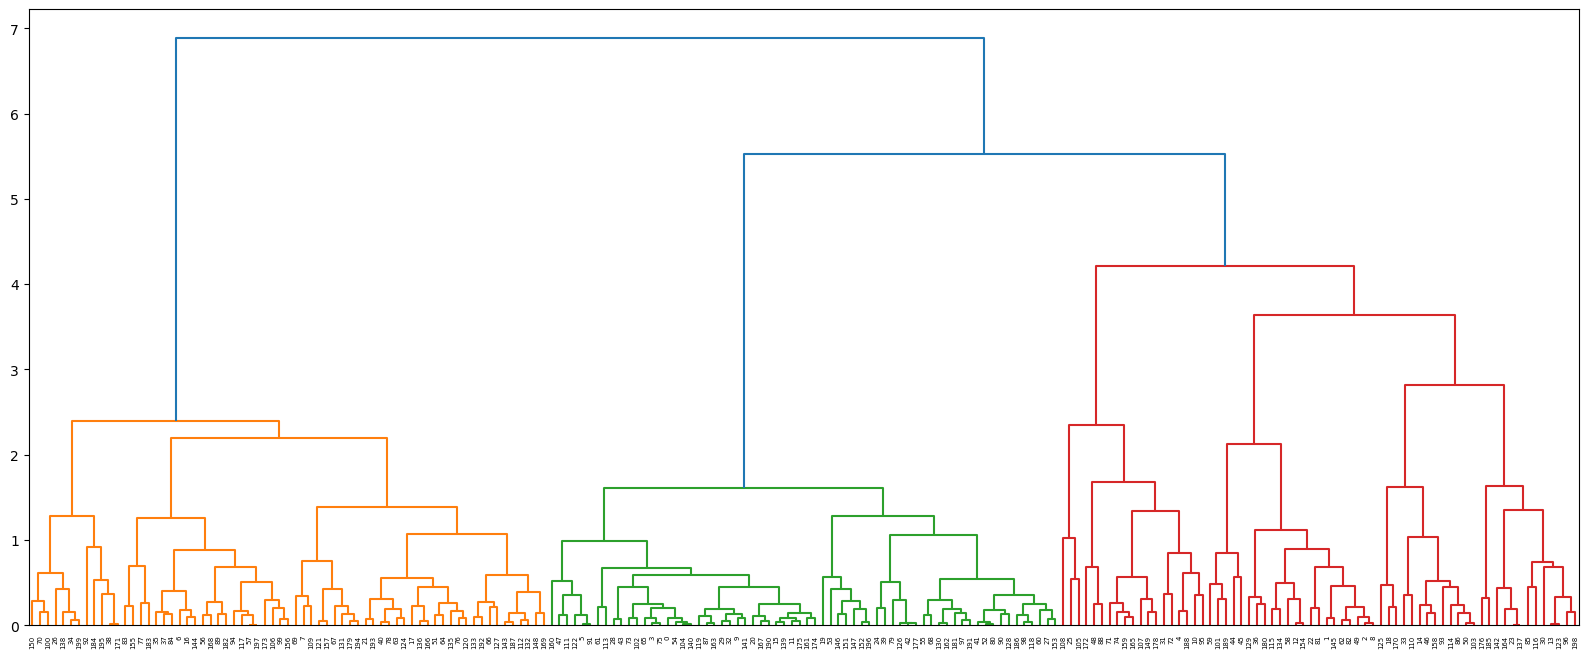

In [9]:
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

## Import Data

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set() 
import pandas as pd
from scipy import stats

data = pd.read_csv("CleanedUpCoreData.csv")

# I am only extracting the 4 relevant columns for HC Clustering
extractedData = data.iloc[:, 1:].copy()

# I am also going to save the original data somewhere. 
originalData = data.copy()

# Showing the head view
extractedData.head()

,CorrectedPorosity,TOC,Quartz,Calcite
0,6.67,4.15,38.6,0.0
1,6.07,4.25,48.6,6.2
2,4.91,3.40,41.0,2.5
3,6.00,0.39,4.6,66.4
4,5.63,3.90,37.0,0.6


## Matrix Scatterplots...

Create a Pandas dataframe, df selecting only the columns you need and naming them accordingly. I am creating a Pandas dataframe to be able to use Seaborn plotting commands. Also create a matrix scatterplot.

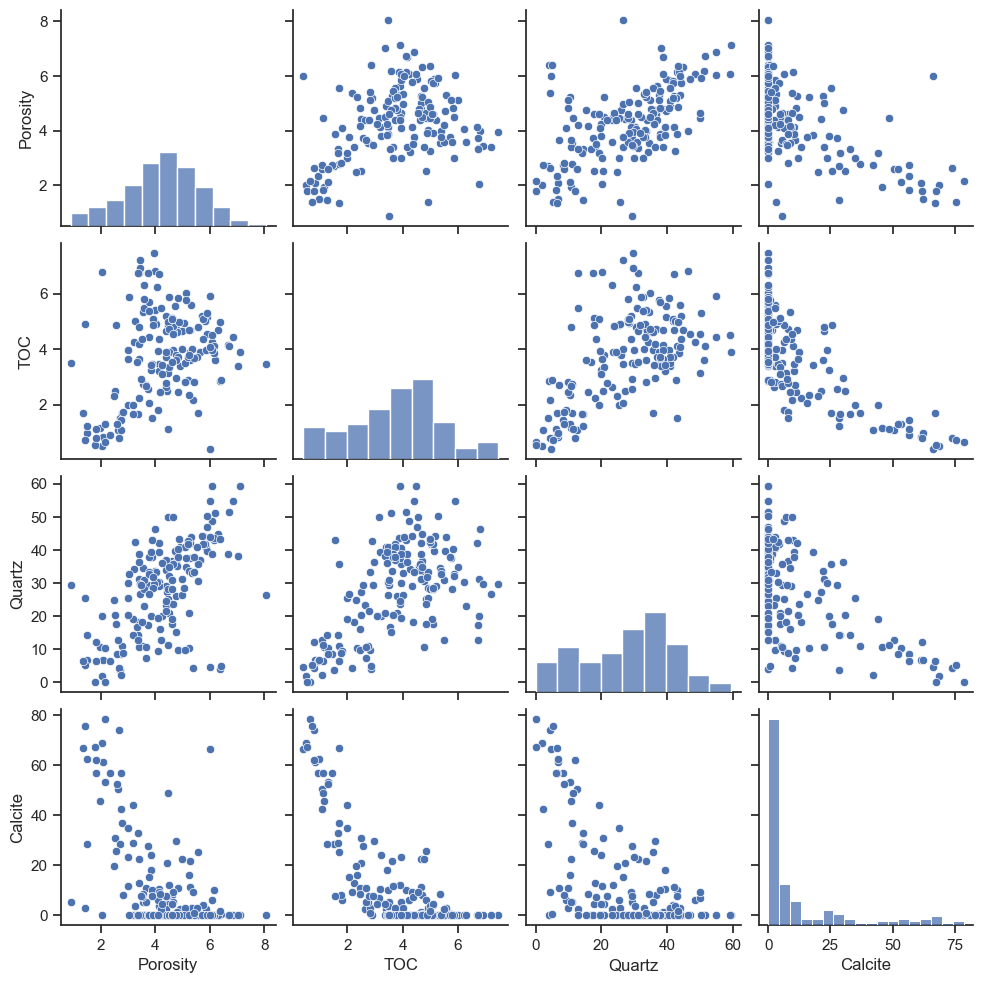

In [23]:
# copy the extracted data to df
df = extractedData.copy()

# renaming the porosity column
df.rename(columns={'CorrectedPorosity': 'Porosity'}, inplace=True)

sns.set(style = 'ticks') # Set the background to ticks

sns.pairplot(df) # Create a matrix scatterplot

## Visualize Trees using Dendograms

In [11]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#### Single Linkage

It is unlikely you will see a balanced treee with 'Single Linkage'. In fact, the example below looks ugly. 

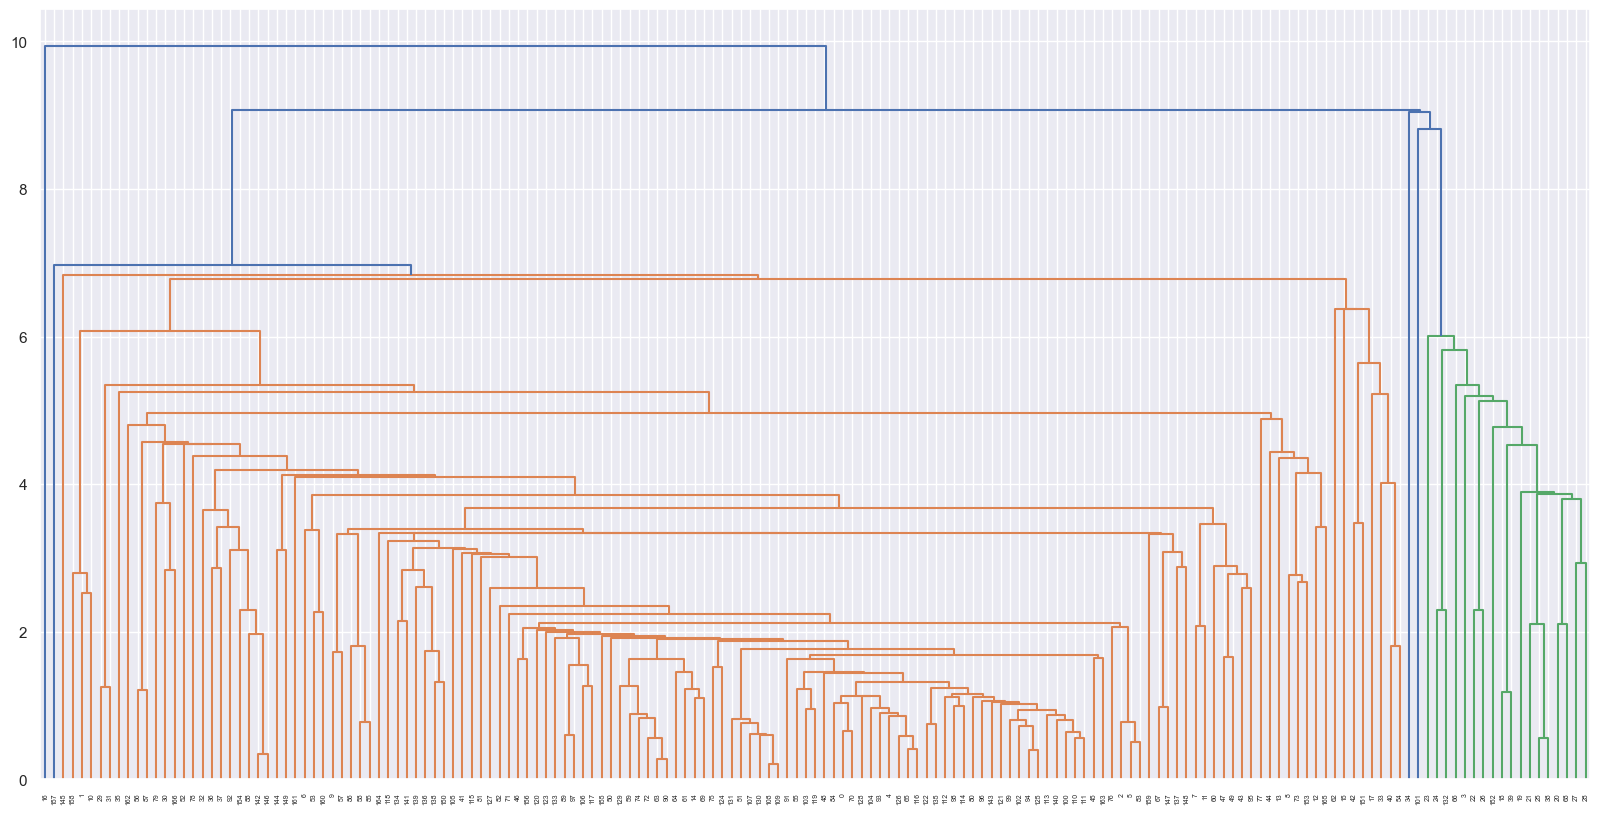

In [12]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(extractedData, method='single'))

#### Complete Linkage

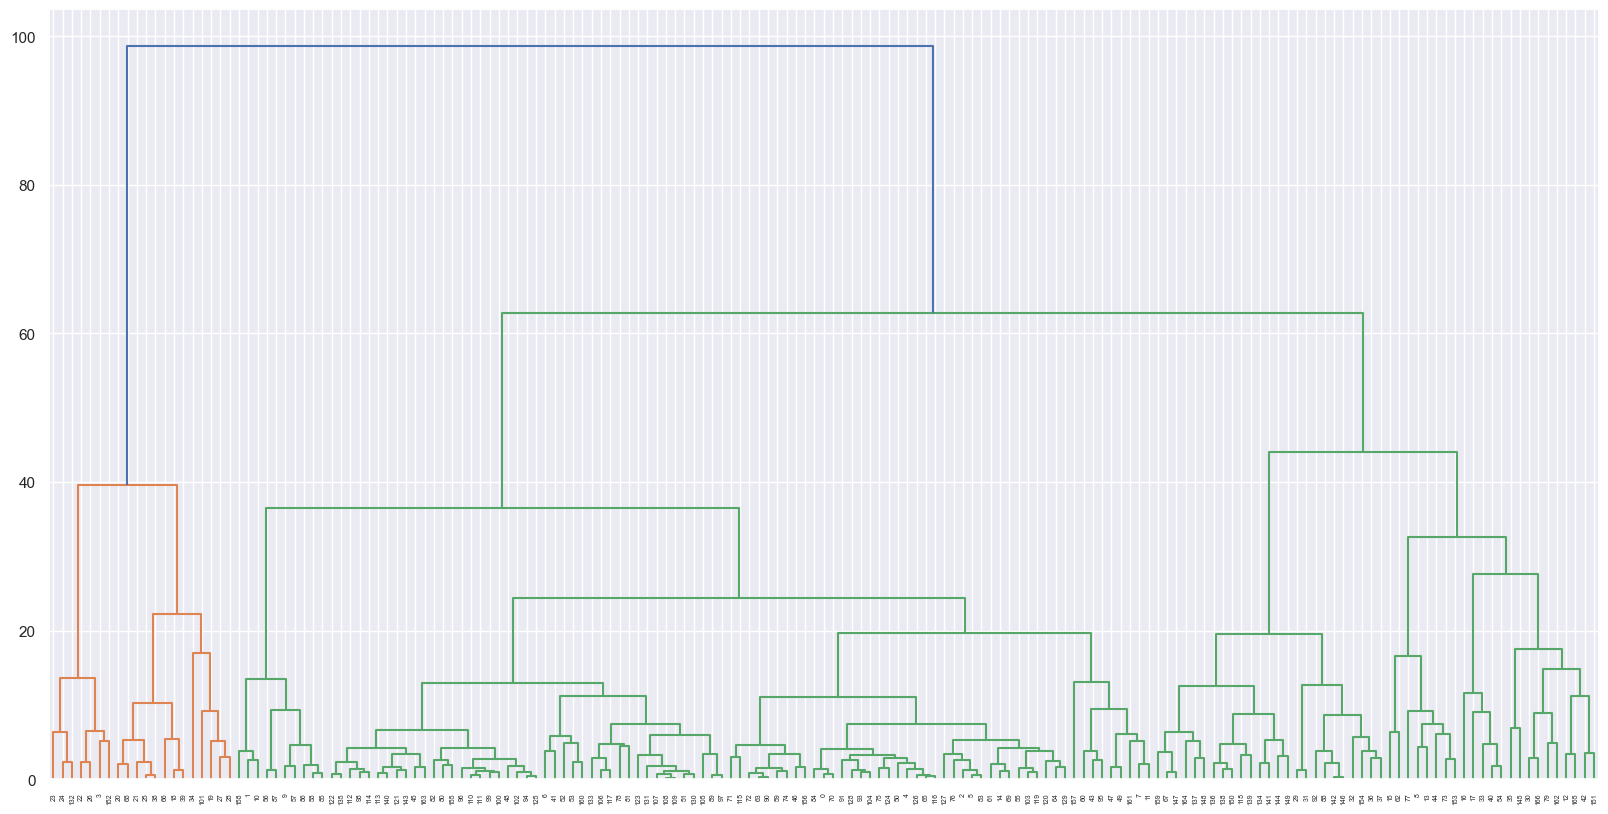

In [13]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(extractedData, method='complete'))

#### Average Linkage

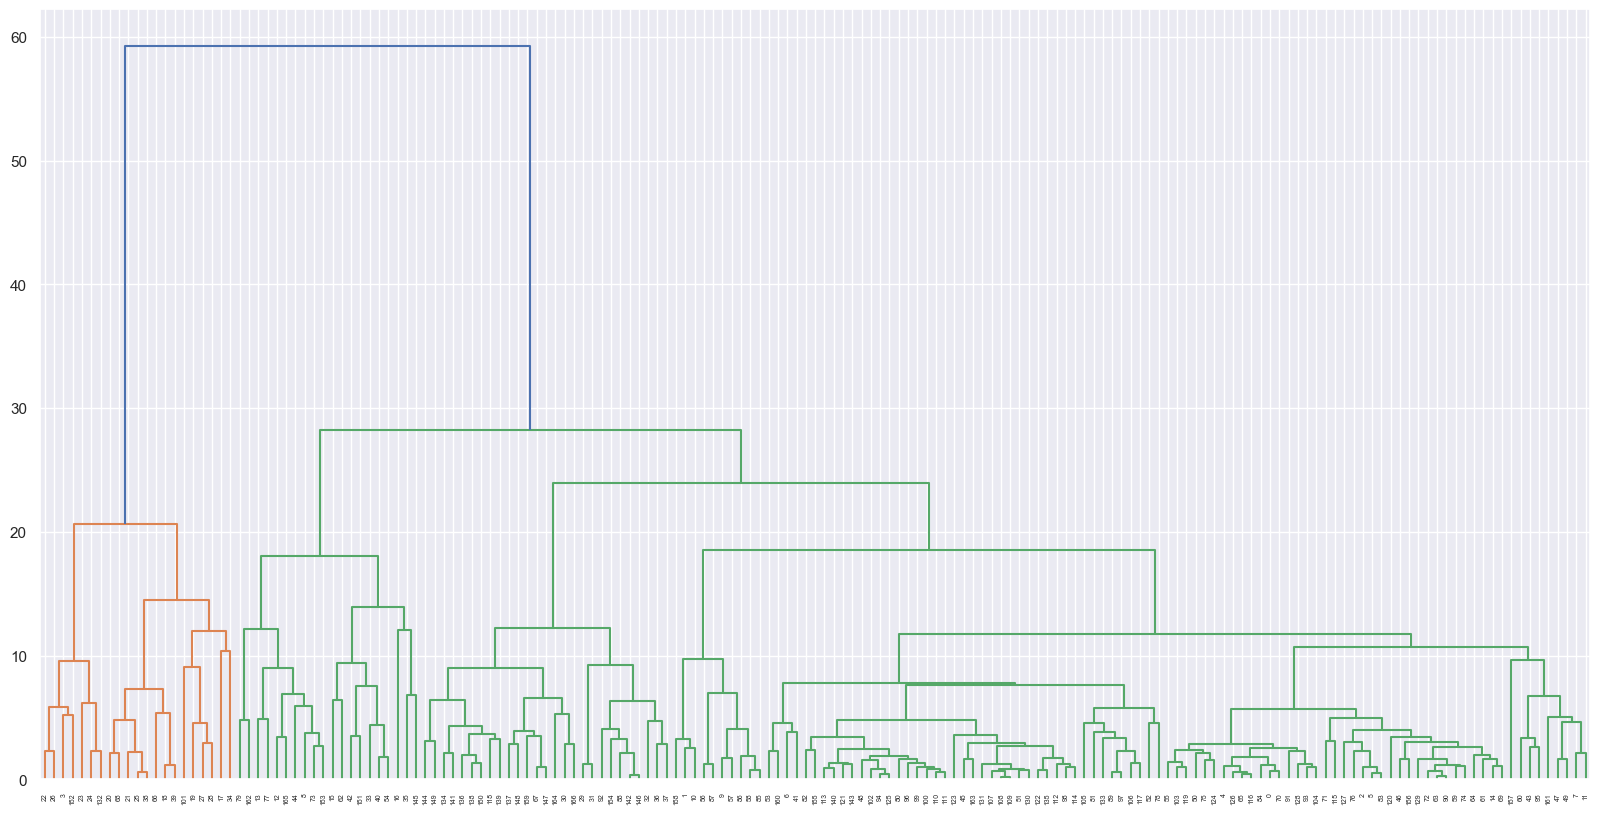

In [14]:
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(extractedData, method='average'))

# Application to Core Data

## Create the clusters and assign cluster numbers/labels

In the cell below, I am creating a model called 'hc' that uses Agglomerative Clustering. I then store the labels in a numpy array called y_hc. 

NOTES
* I can use any linkage that I want. I am using the 'Ward' linkage.
* I can also chose as many clusters as I want. I am attempting to find 4 clusters here. 
* I can also use any measure of similarity/dissimilarity. Here I am using Euclidean distances.

In [15]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
extractedData_scaled = mm_scaler.fit_transform(extractedData)

In [18]:
extractedData_scaled

array([[0.80753138, 0.5303244 , 0.64983165, 0.        ],
       [0.72384937, 0.54442877, 0.81818182, 0.07888041],
       [0.56206416, 0.42454161, 0.69023569, 0.03180662],
       [0.71408647, 0.        , 0.07744108, 0.84478372],
       [0.66248257, 0.49506347, 0.62289562, 0.00763359],
       [0.69316597, 0.50211566, 0.68350168, 0.03435115],
       [0.        , 0.43864598, 0.49326599, 0.06997455],
       [0.73361227, 0.52609309, 0.72558923, 0.12722646],
       [0.61227336, 0.45416079, 0.56734007, 0.27862595],
       [0.71687587, 0.77997179, 0.92255892, 0.        ],
       [0.49930265, 0.38928068, 0.84175084, 0.08905852],
       [0.61227336, 0.60507757, 0.70875421, 0.14631043],
       [0.49372385, 0.29619182, 0.45959596, 0.26844784],
       [0.65132497, 0.18476728, 0.5993266 , 0.32188295],
       [0.58716876, 0.43723554, 0.68855219, 0.00508906],
       [0.22873082, 0.29760226, 0.34343434, 0.39440204],
       [0.25383543, 0.15796897, 0.06228956, 0.36259542],
       [0.26359833, 0.18476728,

In [20]:
# First define the model
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

# Apply the model to the data and predict the clusters
y_hc = hc.fit_predict(extractedData_scaled)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
y_hc

array([2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

## Create a matrix scatterplot with labels

In [24]:
df.head()

,Porosity,TOC,Quartz,Calcite
0,6.67,4.15,38.6,0.0
1,6.07,4.25,48.6,6.2
2,4.91,3.40,41.0,2.5
3,6.00,0.39,4.6,66.4
4,5.63,3.90,37.0,0.6


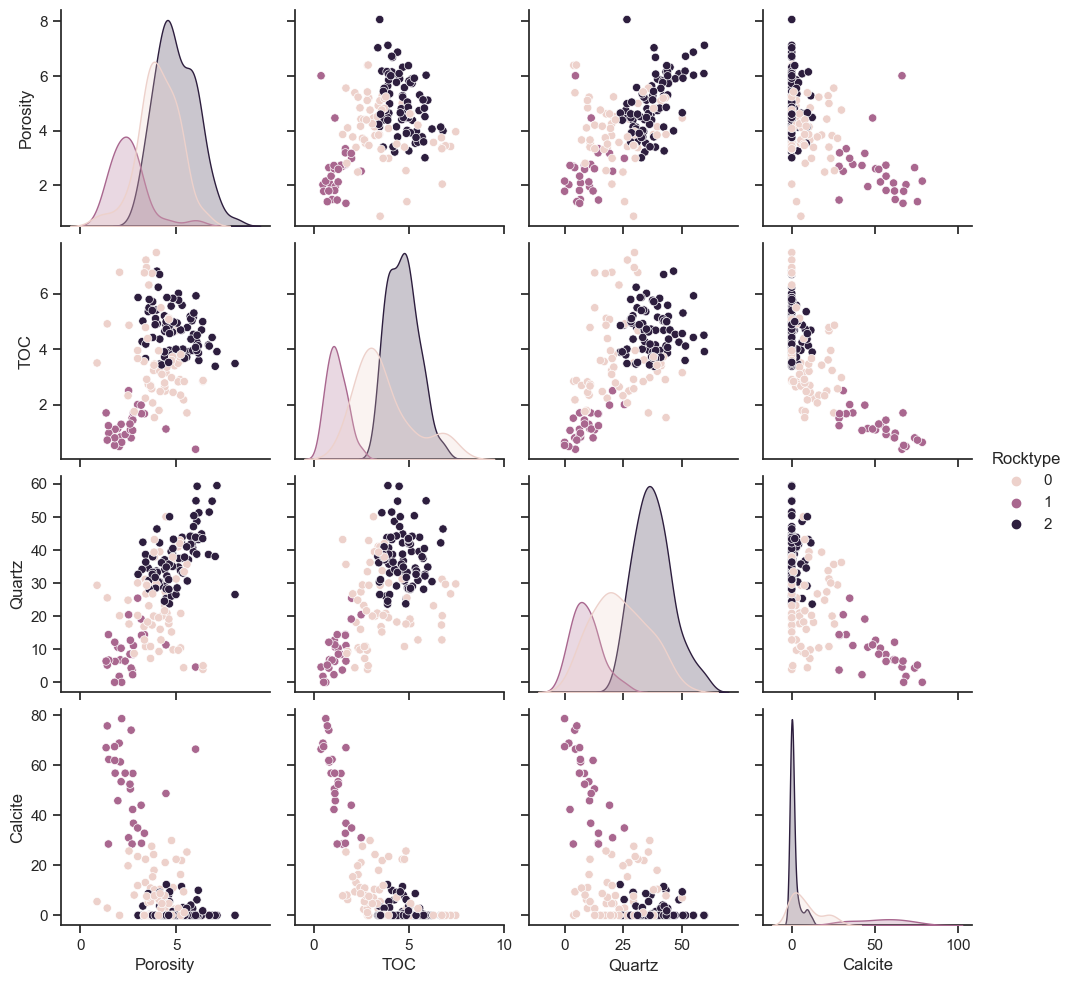

In [26]:
df['Rocktype'] = y_hc # Create a new column in df that refers to the rocktypes created

sns.set(style = 'ticks') # Set the background to dark

sns.pairplot(df, vars = ['Porosity','TOC', 'Quartz','Calcite'], hue = "Rocktype") # Create a matrix scatterplot


In [27]:
df.head()

,Porosity,TOC,Quartz,Calcite,Rocktype
0,6.67,4.15,38.6,0.0,2
1,6.07,4.25,48.6,6.2,2
2,4.91,3.40,41.0,2.5,0
3,6.00,0.39,4.6,66.4,1
4,5.63,3.90,37.0,0.6,2


<Axes: xlabel='Rocktype', ylabel='Porosity'>

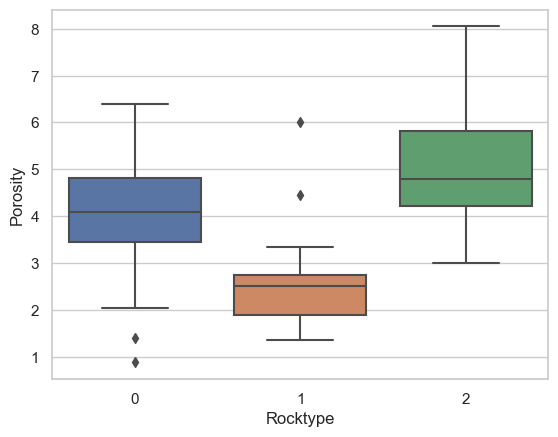

In [28]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Rocktype'], y=df['Porosity'])

<Axes: xlabel='Rocktype', ylabel='Calcite'>

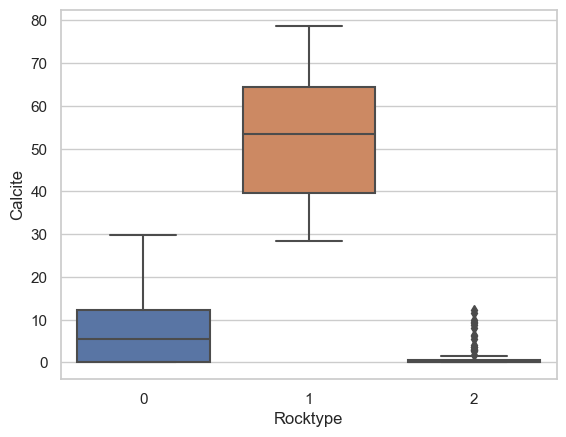

In [29]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Rocktype'], y=df['Calcite'])

<Axes: xlabel='Rocktype', ylabel='TOC'>

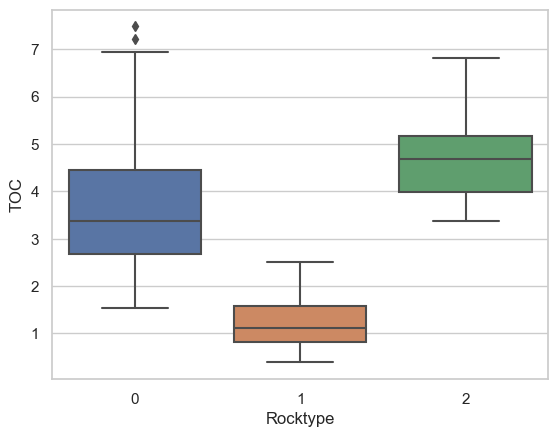

In [30]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Rocktype'], y=df['TOC'])

In [31]:
# First define the model
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# Apply the model to the data and predict the clusters
y_hc = hc.fit_predict(extractedData_scaled)

C:\Users\EBEN\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


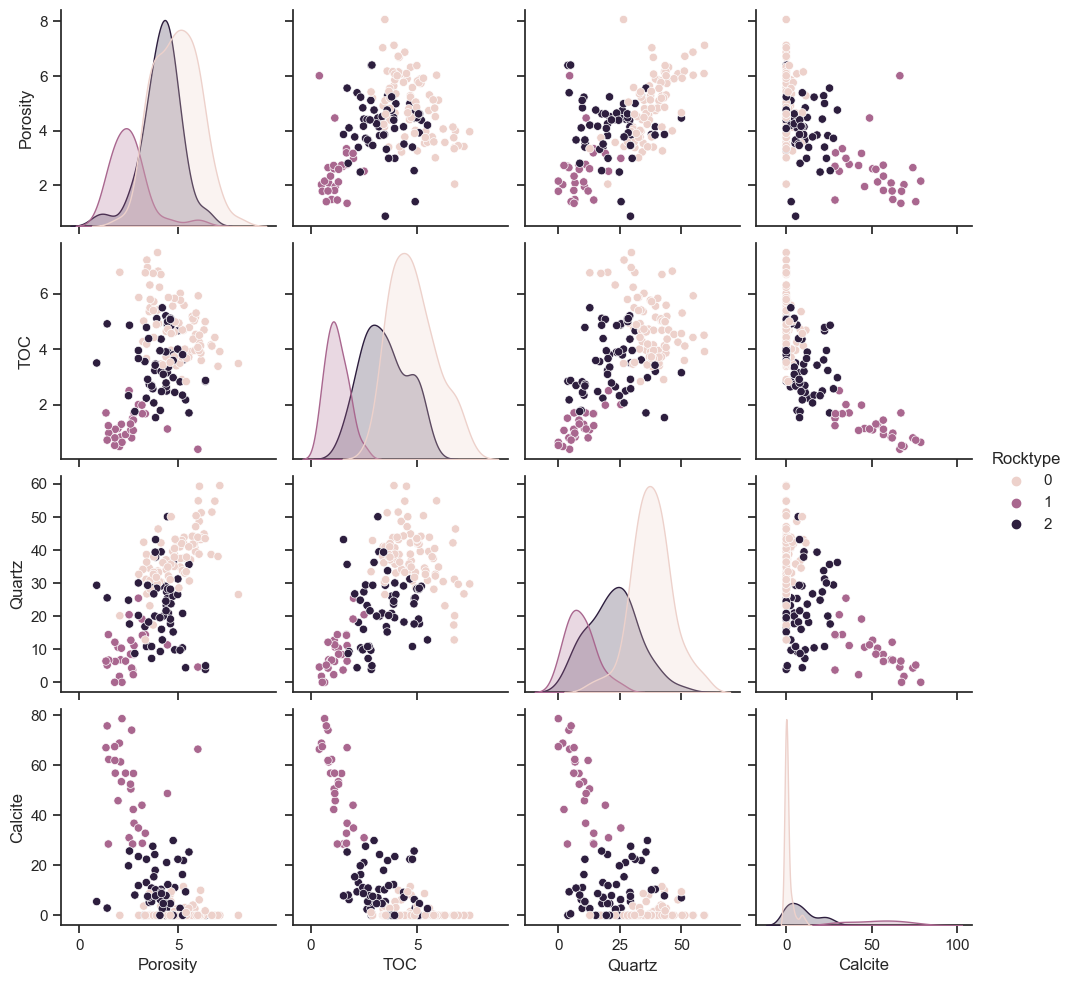

In [32]:
df['Rocktype'] = y_hc

sns.set(style = 'ticks') # Set the background to dark

sns.pairplot(df, vars = ['Porosity','TOC', 'Quartz','Calcite'], hue = "Rocktype") # Create a matrix scatterplot

<Axes: xlabel='Rocktype', ylabel='Porosity'>

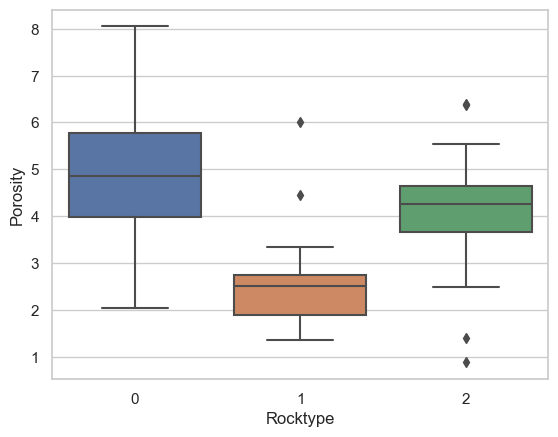

In [33]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Rocktype'], y=df['Porosity'])

<Axes: xlabel='Rocktype', ylabel='Calcite'>

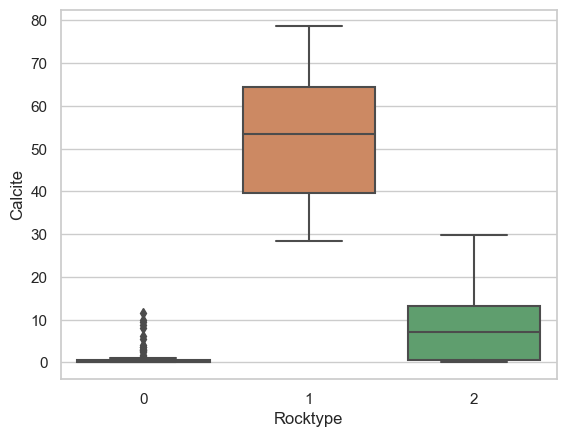

In [34]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Rocktype'], y=df['Calcite'])

<Axes: xlabel='Rocktype', ylabel='TOC'>

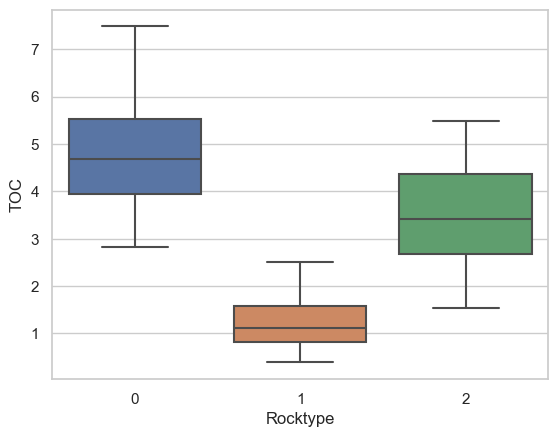

In [35]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Rocktype'], y=df['TOC'])

## Summary

You can see that Hierarchical Clustering works pretty well. The results are similar to that of K-means for this specific dataset. But in any case, keep this picture handy to see the applicability of various clustering algorithms on different data topologies.


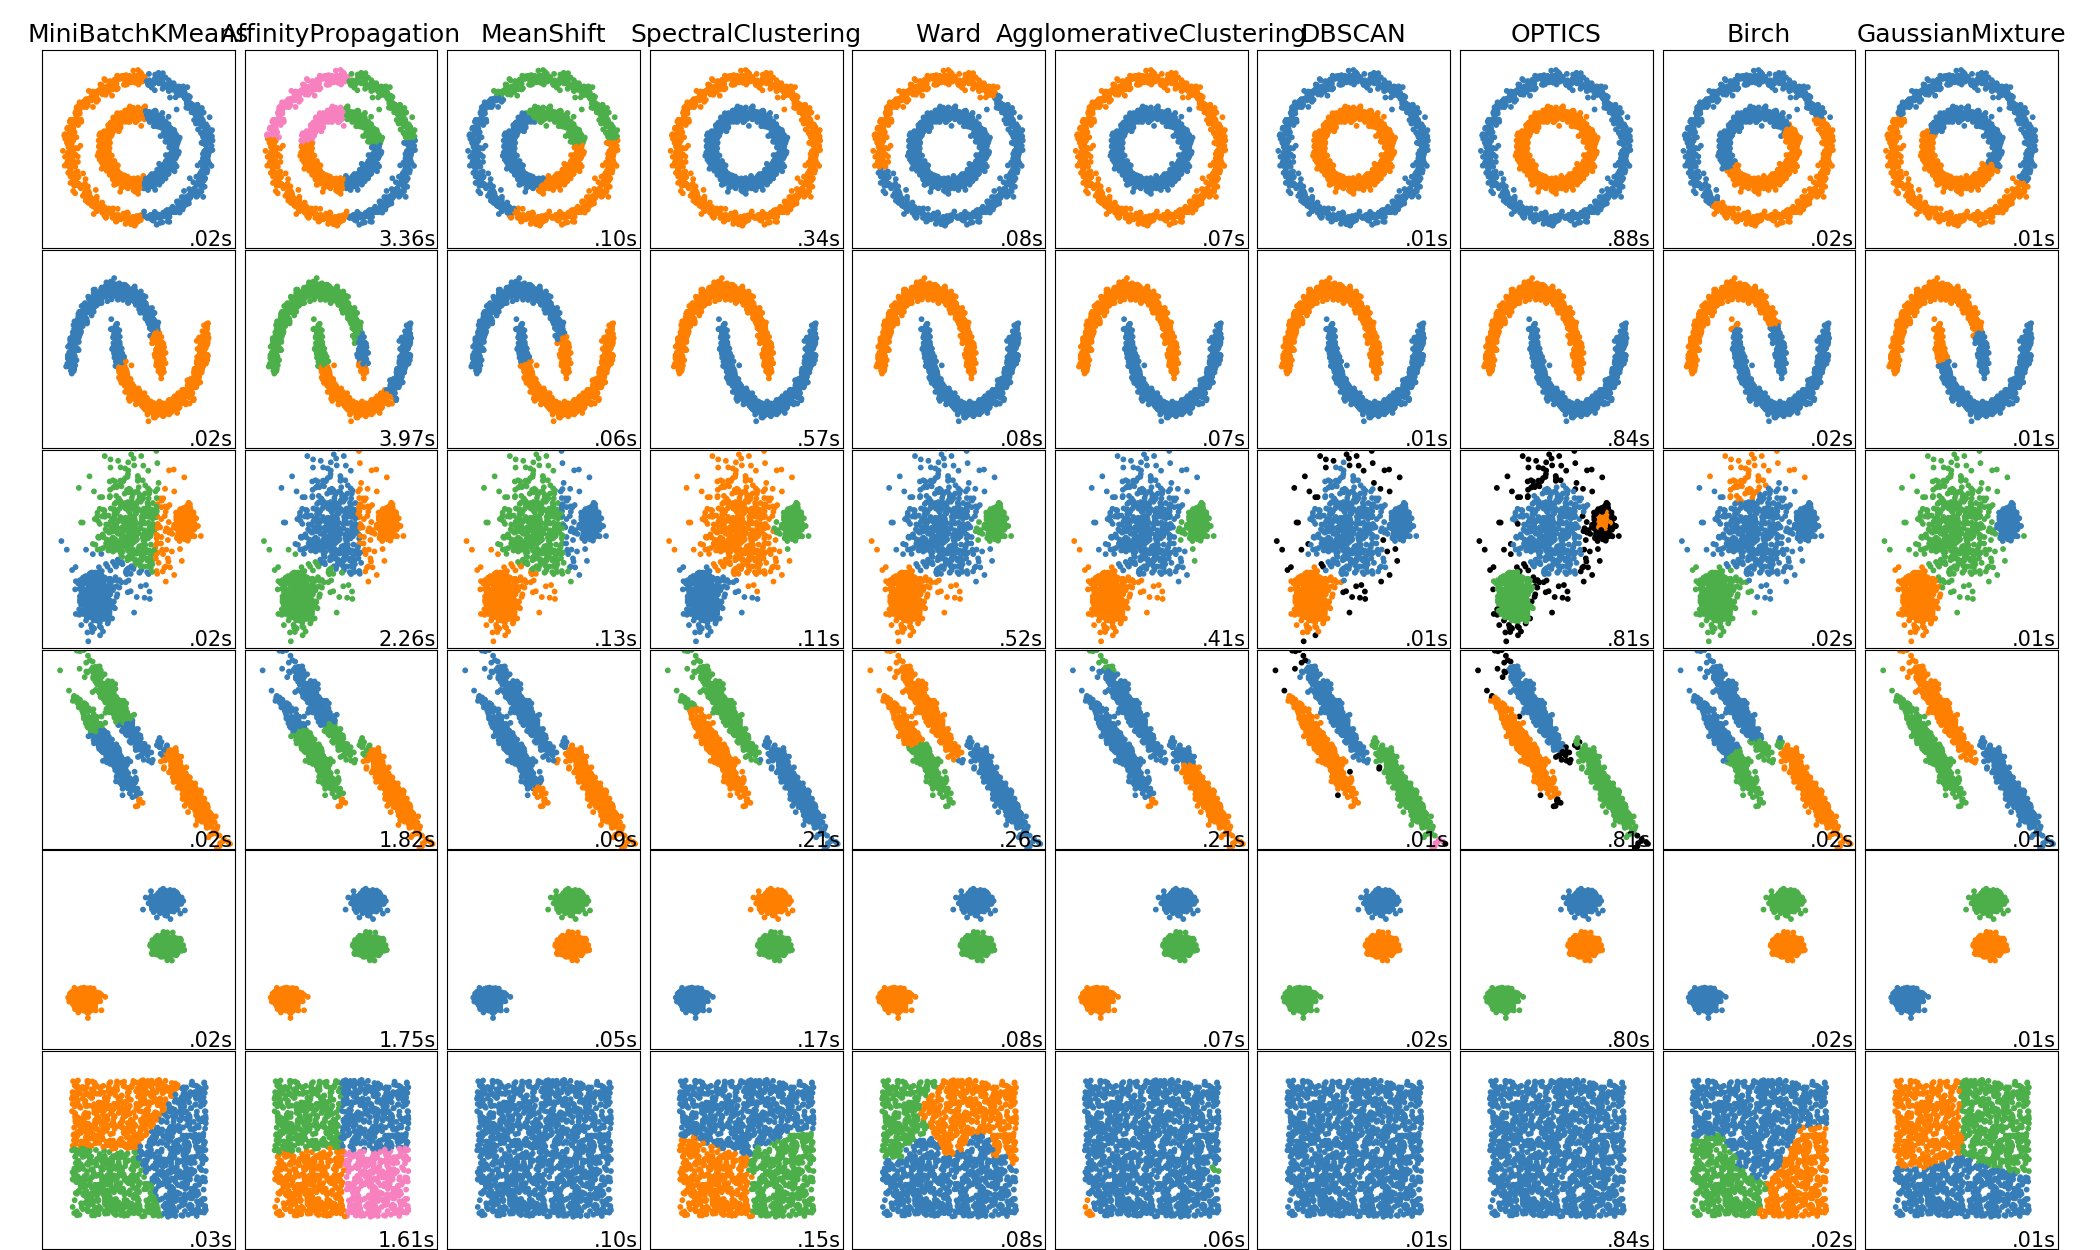